In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('judge 제거_LCE.csv')

In [108]:
import missingno as msno
#msno.bar(df)

In [109]:
df = df.dropna(axis = 1, thresh = 1)

In [27]:
# annotation result = 0, 1, 2 만 남기고 확인 

null_annot = list(np.where(df['annotation_result'].isna() == True)[0])
df = df.drop(null_annot, axis = 'index')
df.index = range(len(df))

three_annot = list(np.where(df['annotation_result'] == 3)[0])
df = df.drop(three_annot, axis = 'index')
df.index = range(len(df))

df['annotation_result'].unique()

zero = list(np.where(df['annotation_result'] == 0)[0])
one = list(np.where(df['annotation_result'] == 1)[0])
two = list(np.where(df['annotation_result'] == 2)[0])
df['annotation_result'][zero] = 0
df['annotation_result'][one] = 0
df['annotation_result'][two] = 1

df['annotation_result'].unique()

array([0., 1.])

In [110]:
df = df.fillna(df.mean())
#df

#
#df = df.fillna(df.mode().iloc[0])
#df

# 
#df = df.fillna(df.median().iloc[0])
#df

In [111]:
pre_df = df.drop(columns = ['hospital_number_id', 'hospital_number', 'sample_date', 'annotation', 'age', 'gender'])
#pre_df

In [30]:
train_df, test_df = train_test_split(pre_df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)

train_features = np.array(train_df.iloc[:, 0:71])
val_features = np.array(val_df.iloc[:, 0:71])
test_features = np.array(test_df.iloc[:, 0:71])

train_labels = np.array(train_df.pop('annotation_result'))
val_labels = np.array(val_df.pop('annotation_result'))
test_labels = np.array(test_df.pop('annotation_result'))

In [31]:
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

scaler = RobustScaler()

train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape: ', train_labels.shape)
print('Validation labels shape: ', val_labels.shape)
print('Test labels shape: ', test_labels.shape)

print('Training features shape: ', train_features.shape)
print('Validation features shape: ', val_features.shape)
print('Test features shape: ', test_features.shape)

Training labels shape:  (1141,)
Validation labels shape:  (286,)
Test labels shape:  (357,)
Training features shape:  (1141, 71)
Validation features shape:  (286, 71)
Test features shape:  (357, 71)


### DeepLearningModel

In [73]:
metrics = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.BinaryAccuracy(name = 'accuracy'),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(name = 'auc'),
    keras.metrics.AUC(name = 'prc', curve= 'PR')
]

In [81]:
def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(32, activation = 'relu', input_dim = 71),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics)
    
    return model

In [82]:
model = make_model()

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                2304      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [76]:
import tensorflow as tf

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_prc', patience = 10, verbose = 1, restore_best_weights = True)
history = model.fit(train_features, train_labels, validation_data = (val_features, val_labels), epochs = 100, batch_size = 2,
                   callbacks = [early_stop])

Epoch 1/100
571/571 [==============================] - 2s 2ms/step - loss: 2.6228 - tp: 100.0000 - fp: 174.0000 - tn: 682.0000 - fn: 185.0000 - accuracy: 0.6854 - precision: 0.3650 - recall: 0.3509 - auc: 0.5679 - prc: 0.3244 - val_loss: 2.1729 - val_tp: 29.0000 - val_fp: 37.0000 - val_tn: 173.0000 - val_fn: 47.0000 - val_accuracy: 0.7063 - val_precision: 0.4394 - val_recall: 0.3816 - val_auc: 0.6500 - val_prc: 0.4344
Epoch 2/100
571/571 [==============================] - 1s 1ms/step - loss: 1.2918 - tp: 124.0000 - fp: 101.0000 - tn: 755.0000 - fn: 161.0000 - accuracy: 0.7704 - precision: 0.5511 - recall: 0.4351 - auc: 0.6851 - prc: 0.4747 - val_loss: 2.1411 - val_tp: 24.0000 - val_fp: 21.0000 - val_tn: 189.0000 - val_fn: 52.0000 - val_accuracy: 0.7448 - val_precision: 0.5333 - val_recall: 0.3158 - val_auc: 0.6468 - val_prc: 0.4489
Epoch 3/100
571/571 [==============================] - 1s 1ms/step - loss: 0.8089 - tp: 146.0000 - fp: 77.0000 - tn: 779.0000 - fn: 139.0000 - accuracy: 0.8

In [85]:
train_predictions = model.predict(train_features, batch_size = 2)
test_predictions = model.predict(test_features, batch_size = 2)

179/179 [==============================] - 0s 506us/step


In [86]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)
    
    plt.plot(precision, recall, label = name, linewidth = 2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

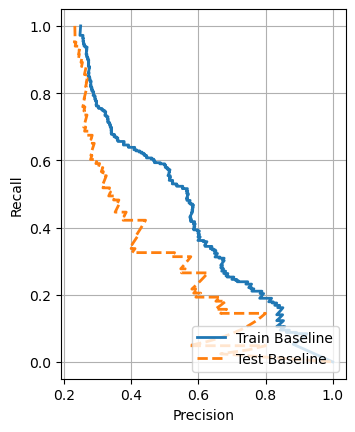

In [87]:
plot_prc("Train Baseline", train_labels, train_predictions)
plot_prc("Test Baseline", test_labels, test_predictions, linestyle = '--')
plt.legend(loc ='lower right')

In [96]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

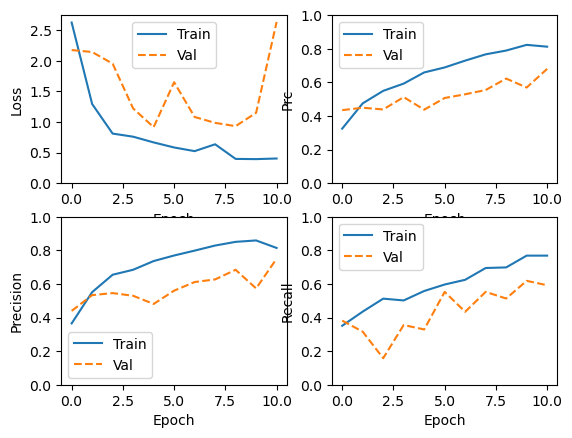

In [97]:
plot_metrics(history)

In [98]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

loss :  2.6619760990142822
tp :  27.0
fp :  40.0
tn :  234.0
fn :  56.0
accuracy :  0.7310924530029297
precision :  0.4029850661754608
recall :  0.3253012001514435
auc :  0.6421598792076111
prc :  0.4258274435997009

Legitimate Transactions Detected (True Negatives):  234
Legitimate Transactions Incorrectly Detected (False Positives):  40
Fraudulent Transactions Missed (False Negatives):  56
Fraudulent Transactions Detected (True Positives):  27
Total Fraudulent Transactions:  83


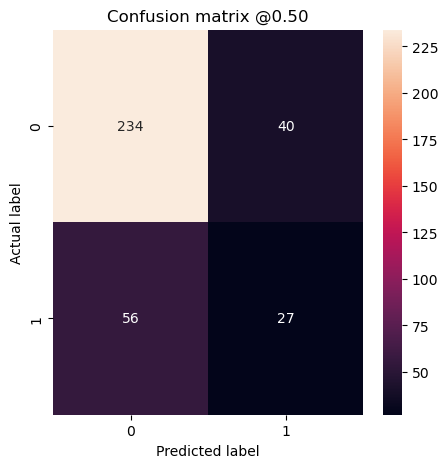

In [107]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=2, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions)